In [1]:
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai')

ModuleNotFoundError: No module named 'jupyterthemes'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# %matplotlib ipympl

In [4]:

t =np.array([])
yn = np.array([])

with open("dataset2.txt","r") as file:
    for line in file:
        splitline = line.split()
        if len(splitline) == 2:
            t = np.append(t,float(splitline[0]))
            yn = np.append(yn, float(splitline[1]))
            

        

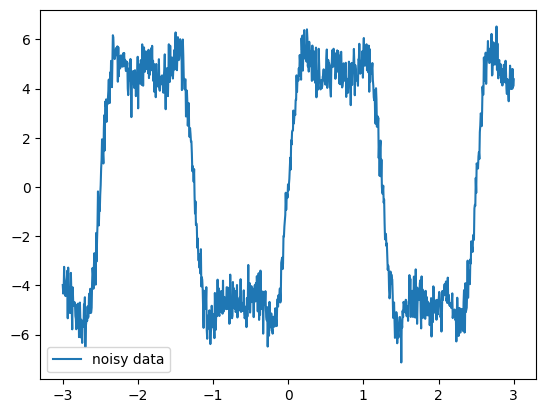

In [5]:
# plot the noisy data
plt.figure()
plt.plot(t,yn, label = "noisy data")
# plt.xticks(np.arange(-0.5,0.5,0.1))
plt.legend()
plt.show()

infinite train of square pulses
there are 3 sine waves superimposed
a1 sin(kt) + a2 sin(3kt) + a3 sing(5kt) + offset
lcm of these time periods is 15kt

if 15kt = 2.5 sec
kt = 2.5/15 = 0.5/3 = 5/30 = 1/6



In [6]:
# # Polynomial fit
# def f1(x, p):
#     return p[1] * np.sin(x) + p[2] * np.sin(3*x) + p[3] + p[0]

# t = np.arange(-3, 3, 0.01)
# p = (2.0, 3.5, 1.0)
# y = f1(t, p)

# yn = y + np.random.randn(len(y))
# plt.plot(t, yn, t, y)
# plt.show()

In [7]:
# Build a model
# Use column_stack to put the vectors side by side
# We use the same time base `t` since we have yn (measurements) for this time base
k = 2 * (np.pi) / 2.5
M = np.column_stack([np.ones(len(t)), np.sin(k*t), np.sin(k*3*t), np.sin(k*5*t)])
p, _, _, _ = np.linalg.lstsq(M, yn, rcond=None)
# print(f"The estimated parameters are: {p[3]} + {p[2]} sin(t) + {p[1]} sin(3t) + {p[0]} sin(5t)")
p

array([-0.02587519,  6.01115293,  2.00154382,  0.98023909])

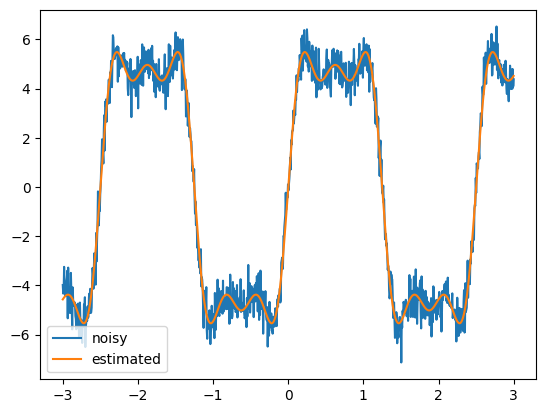

In [8]:
# plot noisy and estimated curves together
def f1(x, p):
    k = 2*np.pi / 2.5
    return p[0] +  p[1] * np.sin(k*x) + p[2] * np.sin(k*3*x) + p[3] * np.sin(k*5*x) 

y_est = f1(t,p)

plt.figure()
plt.plot(t,yn,label = "noisy")
plt.plot(t, y_est, label = "estimated")
plt.legend()
plt.show()

In [12]:
# Set up the non-linear curve fit
def f2(x, a,b,c,d):
    k = k = 2*np.pi / 2.5
    return a +  b * np.sin(k*x) + c * np.sin(k*3*x) + d * np.sin(k*5*x) 


from scipy.optimize import curve_fit
p,pcov = curve_fit(f2, t, yn)
# print(f"Estimated function: {p_scipy[3]} + {p_scipy[2]} sin(t) + {p_scipy[1]} sin(3t) + {p_scipy[0]} sin(5t)")

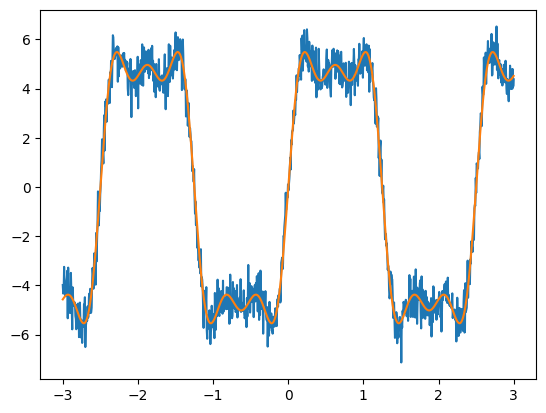

In [9]:

plt.figure()
plt.plot(t, yn, t, f1(t, p))
plt.plot()
plt.show()